# QClassify: an implementation of variational quantum classifier

Classification of points on 2D plane using a 2-qubit quantum circuit. Here we encode a 2-dimensional vector $(\theta_1, \theta_2)$ into a 2-qubit state, and use a parametrized circuit to perform further classification.

The circuit is the following:

<img src="qnn_circuit3.png" width="50%">

The first part is an encoding circuit that serves as a feature map which maps a data point $(\theta_1,\theta_2)$ into a 2-qubit state. The second part is a classifier which produces the output as the probability $p$ of measuring $|0\rangle$ in the top qubit.

References:

The set up of quantum neural network: https://arxiv.org/abs/1802.06002

The encoding idea: https://arxiv.org/abs/1804.00633

The ansatz design: https://arxiv.org/abs/1804.11326

In [1]:
from qclassifier import *

qubits_chosen = [0, 1]
qc = QClassifier(qubits_chosen)

params = [3.0672044712460114, 3.3311348339721203]
input_vec = [1, 1]
qc_prog = qc.circuit(input_vec, params)

In [2]:
print(qc_prog)

RX(1) 0
RX(1) 1
CZ 0 1
RX(3.0672044712460114) 0
RX(3.3311348339721203) 1
DECLARE ro BIT[1]
MEASURE 0 ro[0]



In [3]:
prob = qc.execute()

In [4]:
print(prob)

0.7862


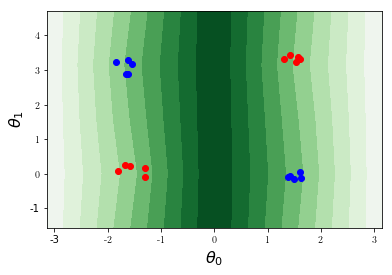

In [5]:
qc.plot_decision_boundary([0,0],[0,1],'qclassifier_db.pdf')

In [6]:
qc.train()

Iter   Obj
   1   0.091
   2   0.091
   3   0.029
   4   0.029
   5   0.018


In [7]:
print(qc.min_loss_history)

[0.09111305351056985, 0.09123507857856071, 0.02901491650146632, 0.028758113874818685, 0.017964009687906717]


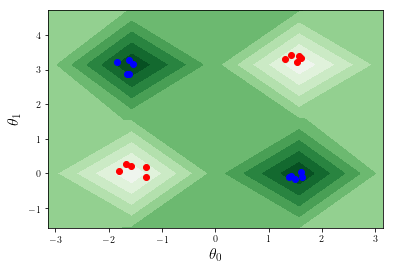

In [8]:
qc.plot_decision_boundary([0,0],[0,1],'qclassifier_db_train.pdf')